# Predicting Dissolved Oxygen Levels in River Water using Machine Learning

**Import Libaries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

C:\Users\bazzu\AppData\Local\Temp\ipykernel_22548\1835377910.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Load Data from CSV File**

In [2]:
df = pd.read_csv("Water Quality Testing.csv")

In [3]:
df

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327
496,497,7.31,22.5,3.8,9.4,361
497,498,7.02,21.2,4.7,7.5,334
498,499,7.25,23.0,3.9,8.7,359


**Clean Data**

In [4]:
df.isnull().sum()

Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe() 
#The NTU unit for turbidity stands for "Nephelometric Turbidity Unit." 
#It is a measure of the cloudiness or haziness of a fluid caused by large numbers of individual particles that are generally invisible to the naked eye. 
# #NTU is a common unit used to quantify turbidity in water and other liquids, particularly in environmental and water quality monitoring.

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,7.161140,22.054400,4.169400,8.382200,344.362000
std,144.481833,0.107531,0.903123,0.397492,0.822396,13.038672
min,1.000000,6.830000,20.300000,3.100000,6.000000,316.000000
25%,125.750000,7.080000,21.200000,3.800000,7.800000,333.000000
50%,250.500000,7.160000,22.200000,4.200000,8.400000,344.000000
75%,375.250000,7.250000,22.900000,4.500000,9.100000,355.000000
max,500.000000,7.480000,23.600000,5.100000,9.900000,370.000000


In [7]:
df = df.drop(columns=["Sample ID"])

**Basic Visualization**

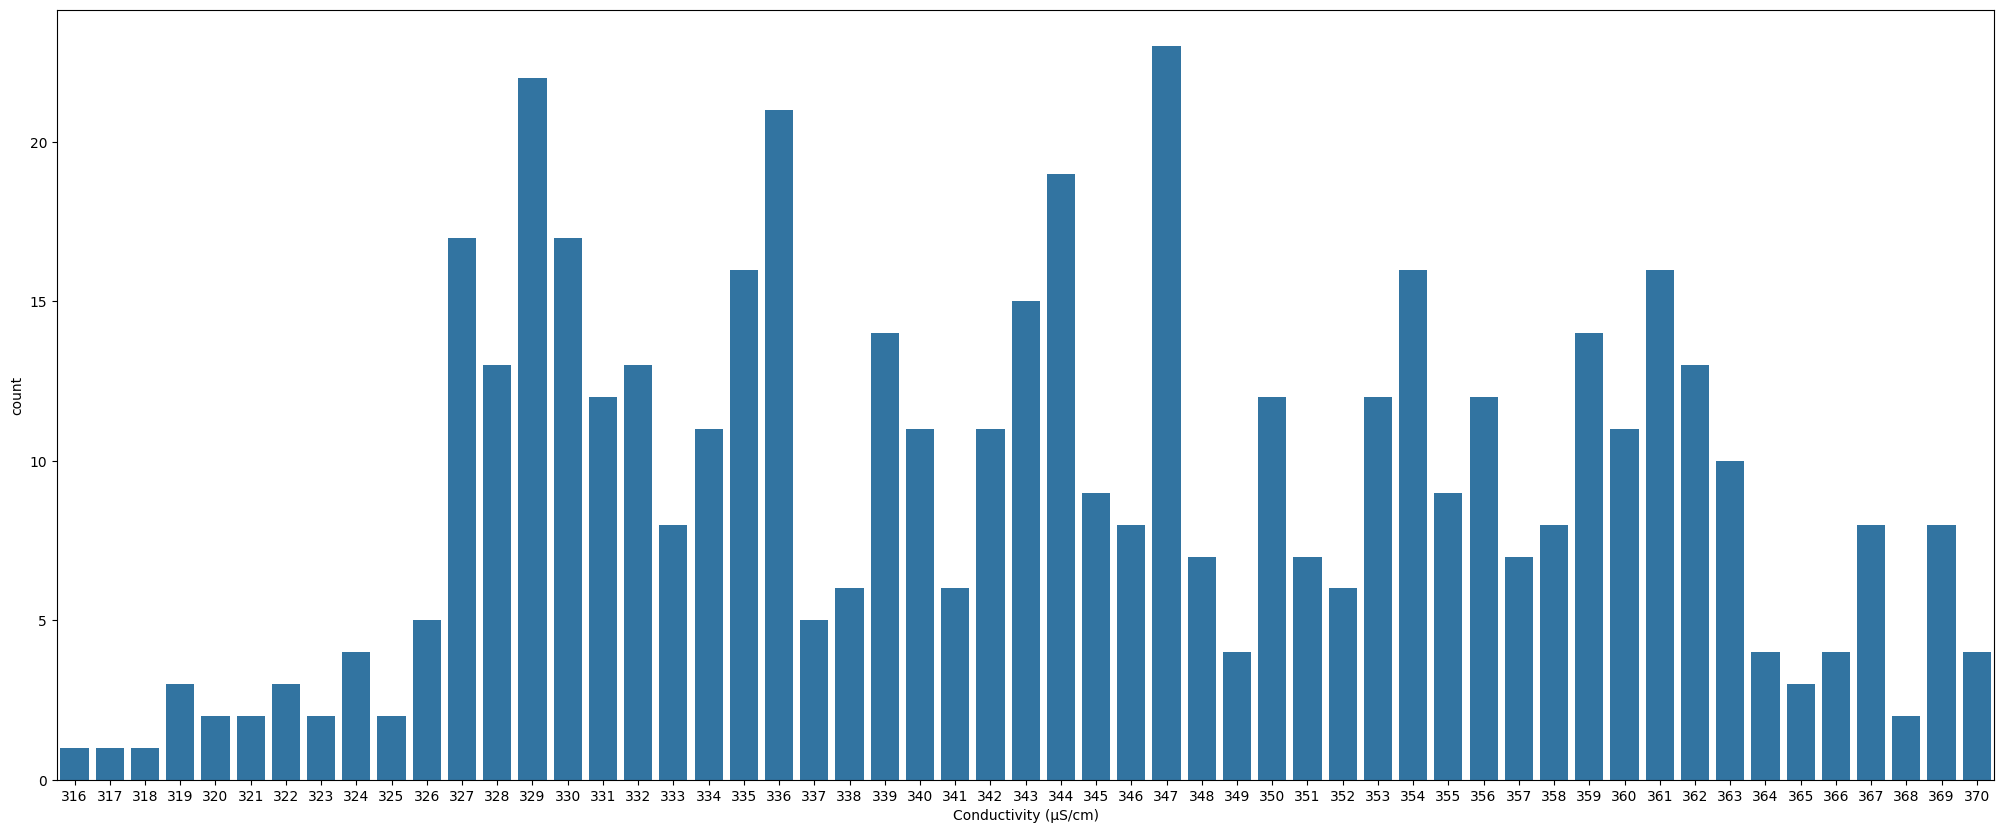

In [8]:
plt.subplots(figsize=(25,10))  
sns.countplot(data=df, x="Conductivity (µS/cm)")
plt.show()

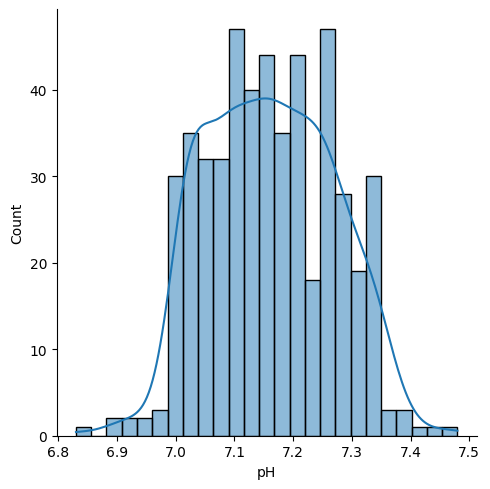

In [9]:
sns.displot(data=df, x="pH", kde=True, bins=25)
plt.show()


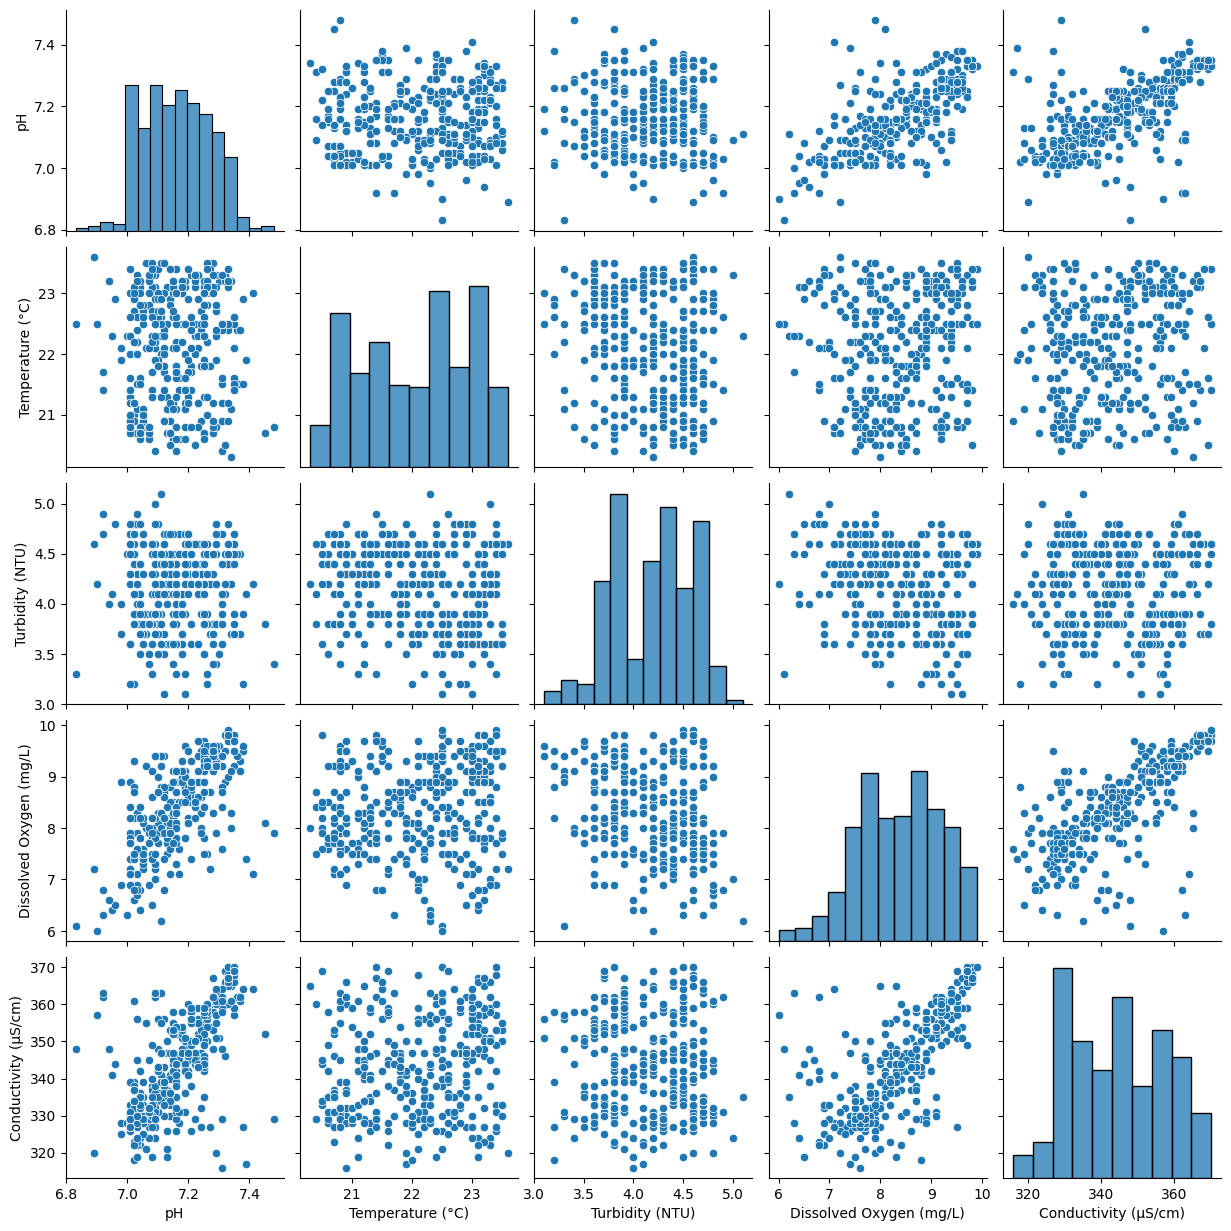

In [10]:
sns.pairplot(df)
plt.show()

**Find Correlations and R squared Values**

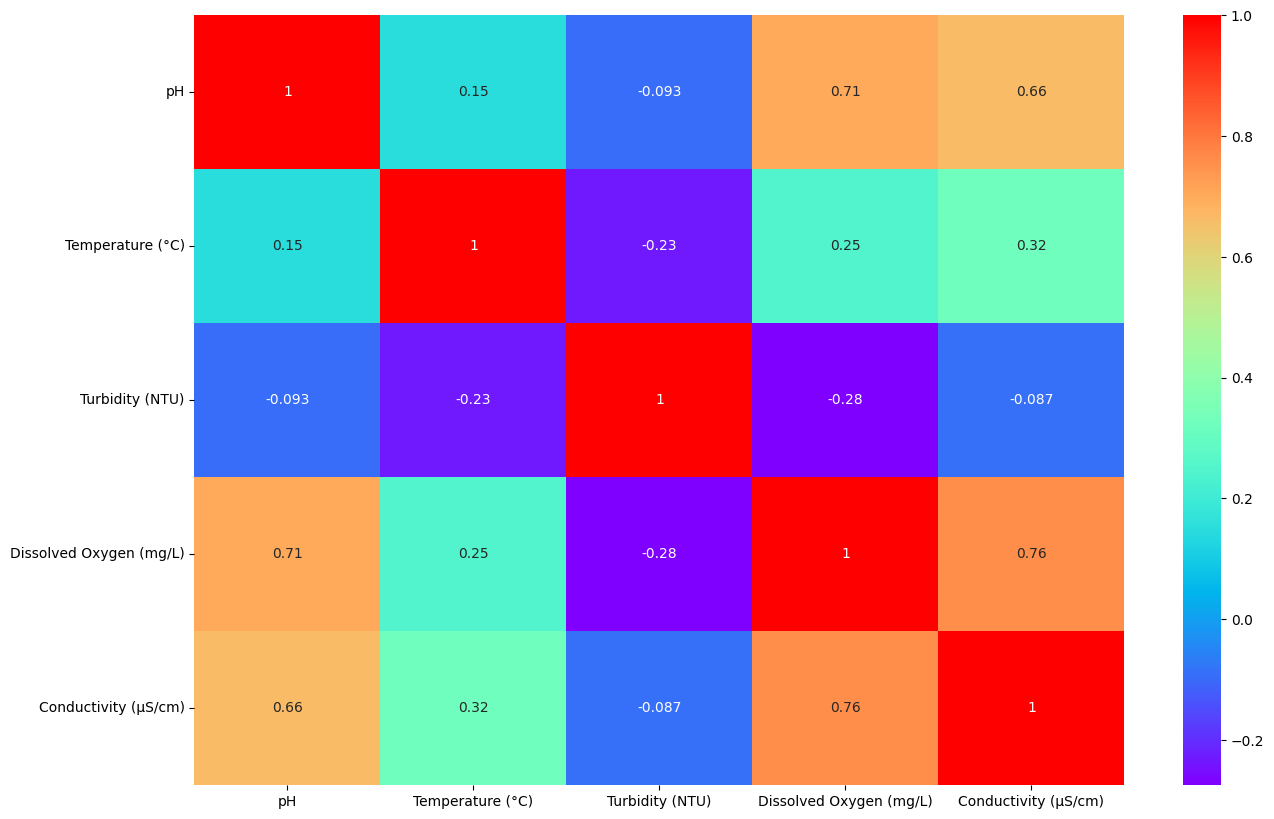

In [11]:
plt.subplots(figsize=(15,10))  
sns.heatmap(df.corr(), cmap="rainbow", annot=True)
plt.show()

In [12]:
corr_L = []
for column in df.drop(["pH"], axis=1).columns:
    corr_L.append(df[column].corr(df["pH"]))
max_corr_index = np.argmax(corr_L)
print(corr_L)
max_corr = df.drop(["pH"], axis=1).columns[max_corr_index]
max_corr

[0.15237424726324744, -0.09285963571524326, 0.7052479638352953, 0.6642316007626193]


'Dissolved Oxygen (mg/L)'

In [13]:
np.max(corr_L)

0.7052479638352953

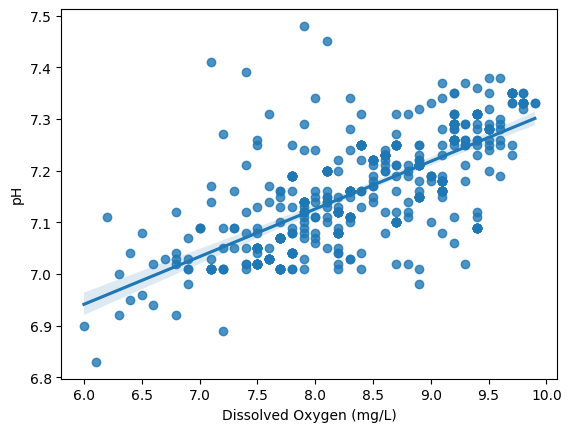

In [14]:
sns.regplot(data=df, y="pH", x="Dissolved Oxygen (mg/L)")
plt.show()

In [15]:
x = df["pH"]
y = df["Dissolved Oxygen (mg/L)"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [16]:
r_value

0.7052479638352953

In [17]:
p_value

2.0593784987367113e-76

In [18]:
r_squared = r_value**2
r_squared

0.49737469049383

In [19]:
col = []
data = []
for column in df.drop(["pH"], axis=1).columns:
    y = df[column]
    x = df["pH"]
    col.append(column)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    data.append([slope, intercept, r_value, p_value, std_err])

df_r = pd.DataFrame(data, columns=["Slope", "Intercept", "R-Value", "P-Value", "Std Err"], index=col)

In [20]:
df_r["R2-Value"] = df_r["R-Value"]**2

In [21]:
df_r

,Slope,Intercept,R-Value,P-Value,Std Err,R2-Value
Temperature (°C),1.279755,12.889899,0.152374,6.293335e-04,0.371963,0.023218
Turbidity (NTU),-0.343260,6.627532,-0.092860,3.792224e-02,0.164930,0.008623
Dissolved Oxygen (mg/L),5.393753,-30.243219,0.705248,2.059378e-76,0.242972,0.497375
Conductivity (µS/cm),80.541720,-232.408534,0.664232,6.249383e-65,4.061753,0.441204


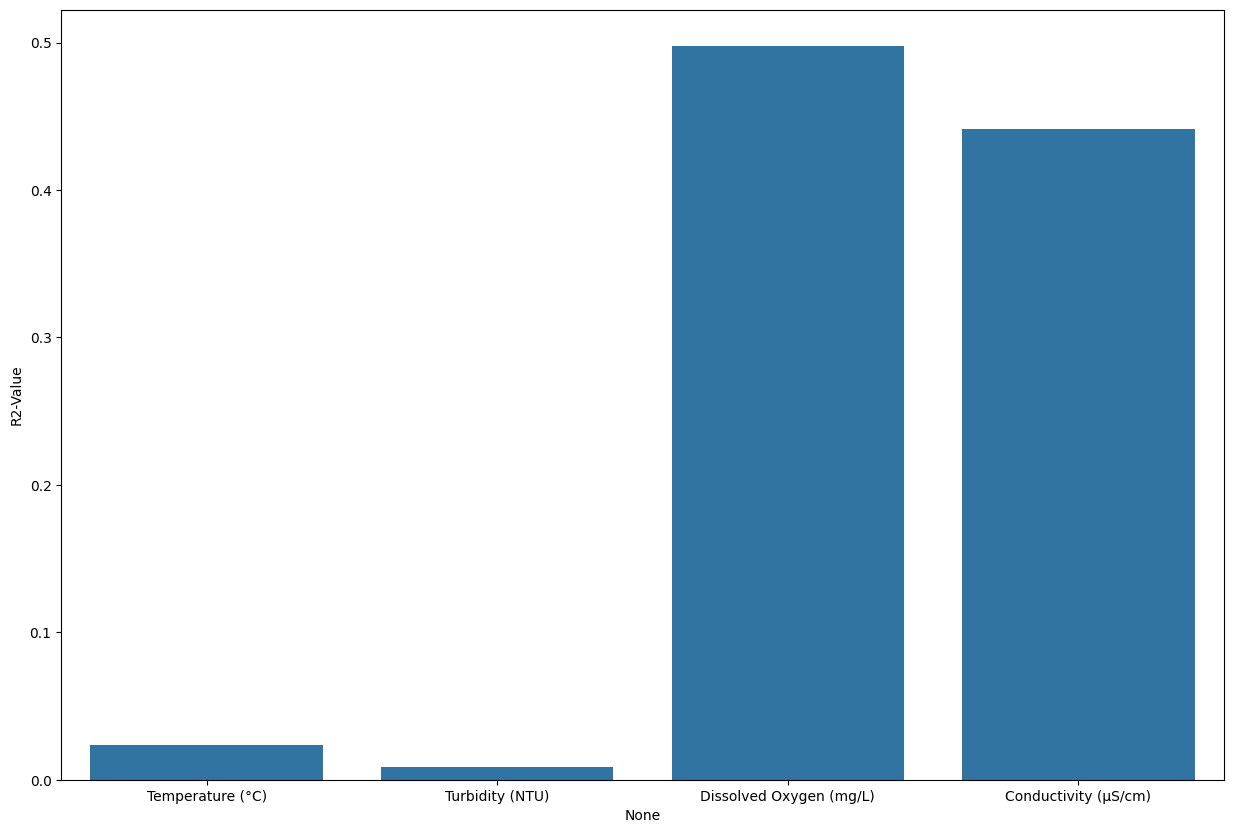

In [22]:
plt.subplots(figsize=(15,10))  
sns.barplot(data=df_r, x=df_r.index, y="R2-Value")
plt.show()

**Start of ML Part**

In [23]:
df

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,7.25,23.1,4.5,7.8,342
1,7.11,22.3,5.1,6.2,335
2,7.03,21.5,3.9,8.3,356
3,7.38,22.9,3.2,9.5,327
4,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...
495,7.01,20.8,4.6,7.1,327
496,7.31,22.5,3.8,9.4,361
497,7.02,21.2,4.7,7.5,334
498,7.25,23.0,3.9,8.7,359


In [24]:
y = df["Dissolved Oxygen (mg/L)"]

In [25]:
features = ["pH", "Temperature (°C)", "Turbidity (NTU)", "Conductivity (µS/cm)"]

In [26]:
X = df[features]
X.head(3)

,pH,Temperature (°C),Turbidity (NTU),Conductivity (µS/cm)
0,7.25,23.1,4.5,342
1,7.11,22.3,5.1,335
2,7.03,21.5,3.9,356


In [27]:
y

0      7.8
1      6.2
2      8.3
3      9.5
4      8.1
      ... 
495    7.1
496    9.4
497    7.5
498    8.7
499    8.2
Name: Dissolved Oxygen (mg/L), Length: 500, dtype: float64

In [28]:
#splitting

In [29]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.20,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [31]:
y_pred=lr.predict(val_X)

In [32]:
y_pred

array([8.75101826, 8.03881711, 8.18388972, 7.2253543 , 7.62498967,
       9.16793506, 7.47916647, 9.01783811, 8.02014615, 7.88813824,
       7.27597291, 9.62415577, 9.4366636 , 8.99935212, 7.54079818,
       8.23192183, 7.26886178, 8.48754863, 9.46954236, 9.16374592,
       9.22074452, 7.54079818, 9.0141311 , 7.54683267, 9.18469678,
       7.54079818, 7.47916647, 8.87006865, 8.58931816, 9.16793506,
       8.72376833, 8.63346774, 8.38864648, 8.25898179, 8.51830801,
       8.87260498, 8.02589533, 8.48864156, 9.4686344 , 8.09536801,
       7.98473606, 8.49023734, 8.88394097, 7.6115343 , 7.91999186,
       7.60039642, 8.38026692, 8.07651709, 8.72376833, 7.60941623,
       9.1055635 , 8.39833781, 9.10875507, 8.38864648, 7.78645778,
       8.98773082, 9.72801709, 7.53828444, 8.37020751, 8.14037722,
       8.18388972, 7.41109461, 8.77500015, 8.87260498, 9.2265909 ,
       7.49020844, 8.75101826, 8.55441722, 8.23377219, 8.75101826,
       7.32076328, 7.54079818, 7.83258121, 8.336286  , 7.47916

In [33]:
mse = mean_squared_error(y_pred,val_y)
mse

0.1879018810730863

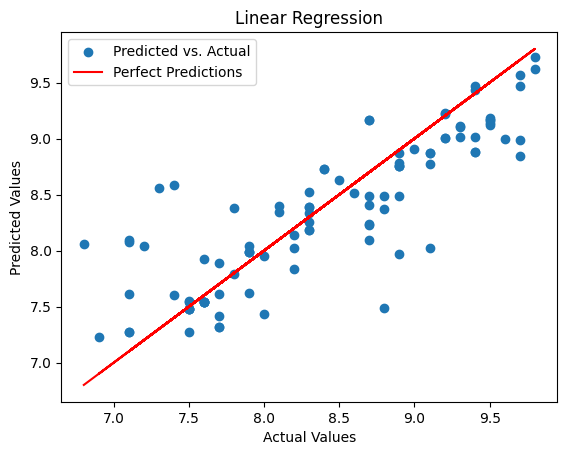

In [34]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.scatter(val_y,y_pred, label='Predicted vs. Actual')
plt.plot(val_y, val_y, color='r', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [35]:
#Randomforest

In [36]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X, y)
rf_val_predictions = rf_model.predict(val_X)
mae = mean_absolute_error(rf_val_predictions, val_y)
mse = mean_squared_error(rf_val_predictions, val_y)
r2 = r2_score(rf_val_predictions, val_y)

In [37]:
rf_val_predictions

array([8.9  , 7.91 , 8.3  , 7.063, 7.835, 9.5  , 7.5  , 9.331, 8.628,
       7.7  , 7.516, 9.723, 9.4  , 9.392, 7.599, 8.7  , 7.1  , 8.755,
       9.394, 8.7  , 9.2  , 7.599, 9.27 , 7.504, 9.451, 7.599, 7.5  ,
       9.018, 7.834, 9.5  , 8.4  , 8.5  , 8.3  , 8.297, 8.57 , 9.1  ,
       8.2  , 8.583, 9.709, 8.473, 7.9  , 8.641, 9.4  , 7.341, 7.611,
       7.606, 8.062, 7.665, 8.4  , 7.759, 9.278, 8.189, 9.249, 8.3  ,
       7.706, 9.42 , 9.765, 7.602, 8.649, 8.161, 8.3  , 7.711, 9.099,
       9.1  , 9.218, 8.596, 8.9  , 7.952, 8.688, 8.9  , 7.7  , 7.599,
       7.959, 8.28 , 7.5  , 9.436, 8.695, 7.545, 9.4  , 7.1  , 7.886,
       8.582, 8.1  , 9.402, 9.2  , 7.555, 9.382, 7.9  , 8.942, 9.729,
       9.2  , 7.7  , 8.6  , 7.9  , 7.599, 7.5  , 8.821, 8.006, 8.7  ,
       6.693])

In [38]:
print("Validation MAE for Random Forest Model: {:,f}".format(mae)) #Mean Absolute Error
print("Validation MSE for Random Forest Model: {:,f}".format(mse)) #Mean Squared Error
print("Validation R2 for Random Forest Model: {:,f}".format(r2)) # R-squared
#R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (the variable being predicted) 
#that is explained by the independent variables (the predictors) in a regression model. It ranges from 0 to 1

Validation MAE for Random Forest Model: 0.081020
Validation MSE for Random Forest Model: 0.024528
Validation R2 for Random Forest Model: 0.956326


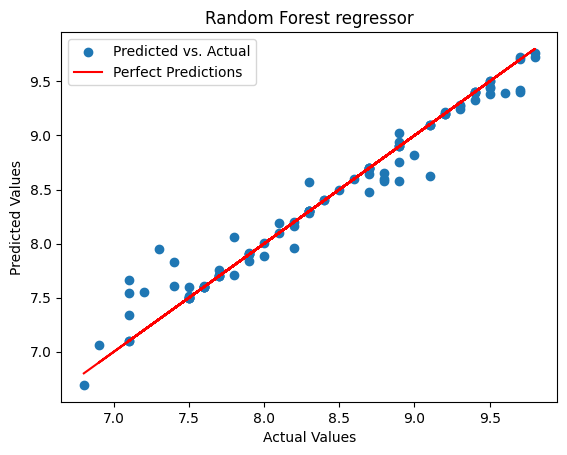

In [39]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.scatter(val_y, rf_val_predictions, label='Predicted vs. Actual')
plt.plot(val_y, val_y, color='r', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest regressor')
plt.legend()
plt.show()


In [40]:
# Create a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({'Actual': val_y, 'Predicted': rf_val_predictions})
print(predictions_df)


     Actual  Predicted
361     8.9      8.900
73      7.9      7.910
374     8.3      8.300
155     6.9      7.063
104     7.9      7.835
..      ...        ...
347     7.5      7.500
86      9.0      8.821
75      8.0      8.006
438     8.7      8.700
15      6.8      6.693

[100 rows x 2 columns]


In [41]:
#SOi Noi RPi SPM

SOi=float(input("Enter the value of pH :"))
NOi=float(input("Enter the value of Temperature:"))
RPi=float(input("Enter the value of Turbidity:"))
SPM=float(input("Enter the value of Conductivity:"))

#Create a numpy array with the input values
input_data=np.array([[SOi,NOi,RPi,SPM]])

#Make predictions using the trained model
predicted_value=rf_model.predict(input_data)

#Print the predicted value
print("Predicted Dissolved Oxygen Level:",predicted_value[0])

Predicted Dissolved Oxygen Level: 6.848999999999998


C:\Users\bazzu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
